# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`


In [ ]:
def myint(bin):
  num=str(bin)
  suma=0
  for i in range(1,len(num)+1):
    suma+=(2**(int(i-1)))*(int(num[-i]))
  return suma
myint(1000011100001)==int(0b1000011100001)

# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [67]:
def number64(num):
  exp=-1023
  mantisa=1
  for i in range(1,12):
    exp+=int(num[12-i])*(2**(i-1))


  for i in range(12,len(num)):
    mantisa+=int(num[i])*(2**(-(i-11)))

  if num[0]=="1":
    return -(mantisa*(2**exp))
  else:
    return(mantisa*(2**exp))


number64("0100000000111011100100001111111111111111111111111111111111111111")

27.566406249999996

# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.

In [39]:
import numpy as np


def arctan(x,tol=1e-5,maxiter=100):
  """
Esto calcula arcotangente de cualquier x tq -1 < x < 1
  """
  suma=0
  iteraciones=0
  for i in range(1,maxiter+1):
    suma+=((-1)**(i+1))*(((x**(2*i-1))/(2*i-1)))
    iteraciones+=1
    if abs((-1)**(i+1))*(((x**(2*i-1))/(2*i-1)))<tol:
      return suma,iteraciones
  raise RuntimeError("Demasiadas iteraciones")




def pi(x,tol, maxiter=40000):

  """
Método Básico para calcular pi
  """
  suma=0
  iteraciones=0
  for i in range(1,maxiter+1):
    suma+=((-1)**(i+1))*(((x**(2*i-1))/(2*i-1)))
    iteraciones+=1
    if abs(4*suma-np.pi)<tol:
      return 4*suma,iteraciones
  raise RuntimeError("Demasiadas iteraciones")

pie3=pi(1,1e-3)[0]
pie4=pi(1,1e-4)[0]
print(f"Usando la aproximación básica, el valor de pi con tolerancia 10^-3 es {pie3}, con {pi(1,1e-3)[1]} iteraciones. Con tolerancia 10^-4 es {pie4}, con {pi(1,1e-4)[1]} iteraciones")


def meto2(x,tol,maxiter=40000):
  suma=0
  iteraciones=0
  for i in range(1,maxiter+1):
    suma+=((-1)**(i+1))*(((x**(2*i-1))/(2*i-1)))
    iteraciones+=1
    if abs(4*(arctan(1/2)[0]+arctan(1/3)[0])-4*suma)<tol:
      return 4*suma,iteraciones
  raise RuntimeError("Demasiadas iteraciones")
print(f"Usando la aproximación mejorada, el valor de pi con tolerancia 10^-3 es {meto2(1,1e-3)[0]}, con {meto2(1,1e-3)[1]} iteraciones. Con tolerancia 10^-4 es {meto2(1,1e-4)}, con {meto2(1,1e-4)[1]} iteraciones")

def meto3(x,tol,maxiter=10000):
  suma=0
  iteraciones=0
  for i in range(1,maxiter+1):
    suma+=((-1)**(i+1))*(((x**(2*i-1))/(2*i-1)))
    iteraciones+=1
    if abs(4*(4*arctan(1/5)[0]-arctan(1/239)[0])-4*suma)<tol:
      return 4*suma,iteraciones
  raise RuntimeError("Demasiadas iteraciones")
print(f"Usando el 'método de alta precisión', el valor de pi con tolerancia 10^-3 es {meto3(1,1e-3)[0]}, con {meto3(1,1e-3)[1]} iteraciones. Con tolerancia 10^-4 es {meto3(1,1e-4)}, con {meto3(1,1e-4)[1]} iteraciones")


Usando la aproximación básica, el valor de pi con tolerancia 10^-3 es 3.140592653839794, con 1000 iteraciones. Con tolerancia 10^-4 es 3.1414926535900345, con 10000 iteraciones
Usando la aproximación mejorada, el valor de pi con tolerancia 10^-3 es 3.1425997026798886, con 993 iteraciones. Con tolerancia 10^-4 es (3.1417011958666783, 9213), con 9213 iteraciones
Usando el 'método de alta precisión', el valor de pi con tolerancia 10^-3 es 3.140592653839794, con 1000 iteraciones. Con tolerancia 10^-4 es (3.1414917861298832, 9914), con 9914 iteraciones


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

La serie evaluada en 1 converge a 0.3678794642857144 , tras 11 iteraciones. El error porcentual respecto al valor de numpy es 1e-05%
La serie evaluada en 1 con el otro método converge a 0.36787944486780905 , tras 11 iteraciones. El error porcentual respecto al valor de numpy es 1e-06%, menos error que de la otra forma con las mismas iteraciones.
La serie que representa e^10 converge a 22026.464036258916 , tras 11 iteraciones. El error porcentual respecto al valor de numpy es 8e-06%
[1.0, -10.0, 50.0, -166.66666666666666, 416.6666666666667, -833.3333333333334, 1388.888888888889, -1984.126984126984, 2480.15873015873, -2755.731922398589, 2755.731922398589, -2505.210838544172, 2087.67569878681, -1605.9043836821616, 1147.0745597729724, -764.7163731819817, 477.9477332387385, -281.14572543455205, 156.19206968586226, -82.2063524662433, 41.10317623312165, -19.572941063391262, 8.896791392450574, -3.868170170630684, 1.6117375710961184, -0.6446950284384474, 0.24795962632247975, -0.0918368986379554

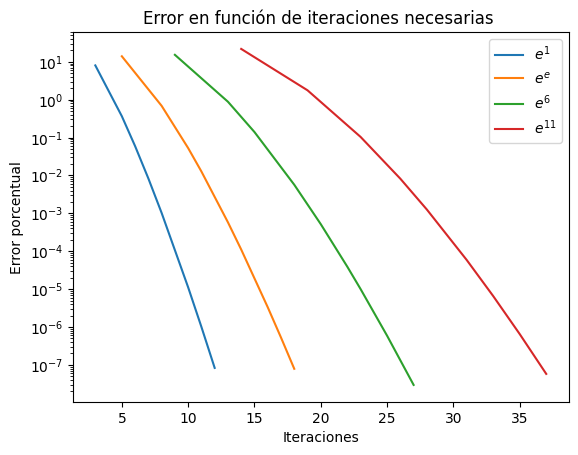

2.718281828459045 15.154262241479262 403.4287934927351 59874.14171519782


In [115]:
from math import factorial
import matplotlib.pyplot as plt

def emx1(x,tol=1e-7,maxiter=5000):
  suma=0
  term=[]
  for i in range(0,maxiter):
    suma+=((-x)**i)/(factorial(i))
    term.append(((-x)**i)/(factorial(i)))
    if abs(((-x)**(i+1))/(factorial(i+1)))<=suma*tol:
      return suma, term
print(f"La serie evaluada en 1 converge a {emx1(1)[0]} , tras {len(emx1(1)[1])} iteraciones. El error porcentual respecto al valor de numpy es {round(((emx1(1)[0]-np.exp(-1))/np.exp(-1))*100, 5)}%")

def emx2(x,tol=1e-7,maxiter=5000):
  suma=0
  term=[]
  for i in range(0,maxiter):
    suma+=((x)**i)/(factorial(i))
    term.append(suma)
    if abs(((-x)**(i+1))/(factorial(i+1)))<=suma*tol:
      return suma, term
print(f"La serie evaluada en 1 con el otro método converge a {1/emx2(1)[0]} , tras {len(emx2(1)[1])} iteraciones. El error porcentual respecto al valor de numpy es {round(((1/emx2(1)[0]-1/np.exp(1))/(1/np.exp(1)))*100, 7)}%, menos error que de la otra forma con las mismas iteraciones.") #Efectivamente el error es menor al hacerlo fracción

print(f"La serie que representa e^10 converge a {emx2(10)[0]} , tras {len(emx2(1)[1])} iteraciones. El error porcentual respecto al valor de numpy es {abs(round(((emx2(10)[0]-np.exp(10))/np.exp(10))*100, 6))}%")

print(emx1(10)[1]) #Acá está la lista de los términos, pero no se ve que se cancele nada en n=9


tol=[1e-1,1e-2,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]
N1=[]
N2=[]
N3=[]
N4=[]
error1=[]
error2=[]
error3=[]
error4=[]
for i in tol:
  N1.append(len(emx2(1,i)[1]))
  N2.append(len(emx2(np.e,i)[1]))
  N3.append(len(emx2(6,i)[1]))
  N4.append(len(emx2(11,i)[1]))
  error1.append(abs((emx2(1,i)[0]-np.exp(1))/(np.exp(1)))*100)
  error2.append(abs((emx2(np.e,i)[0]-np.exp(np.e))/(np.exp(np.e)))*100)
  error3.append(abs((emx2(6,i)[0]-np.exp(6))/(np.exp(6)))*100)
  error4.append(abs((emx2(11,i)[0]-np.exp(11))/(np.exp(11)))*100)

plt.semilogy(N1,error1,label="$e^1$")
plt.semilogy(N2,error2,label="$e^e$")
plt.semilogy(N3,error3,label="$e^6$")
plt.semilogy(N4,error4,label="$e^{11}$")

plt.title("Error en función de iteraciones necesarias ")
plt.xlabel("Iteraciones")
plt.ylabel("Error porcentual")
plt.legend()
plt.show()
print(np.exp(1),np.exp(np.e),np.exp(6),np.exp(11))

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


In [116]:
import matplotlib.pyplot as plt
import numpy as np
f=lambda x: x*(x-1)
def df(f,x, tol):
  return (f(x+tol)-f(x))/tol
dos=df(f,1,1e-2)
cuatro=df(f,1,1e-4)  #La derivada evaluada en 1 debe dar 1 (2-1)
seis=df(f,1,1e-6)
ocho=df(f,1,1e-8) #esta es la que da la mejor aproximación
diez=df(f,1,1e-10)
doce=df(f,1,1e-12)
catorce=df(f,1,1e-14)
print(dos, cuatro,seis,ocho,diez,doce,catorce)
tols=[1e-2,1e-4,1e-6,1e-8,1e-10,1e-12,1e-14]
val=[dos,cuatro,seis,ocho,diez,doce,catorce]

error=[]
for i in val:
  error.append(f"{round(abs(i-1)*100,7)}%")
print("Lista de errores porcentuales", error, "Los resultados no coinciden exactamente porque el computador no puede evaluar límites, solo evaluar para números muy, muy pequeños")
#El comportamiento extraño que hace que disminuya y luego aumente es porque para valores muy grandes de δ la diferencia en el numerador es demasiado grande, pero para valores demasiado pequeños de δ el valor de la derivada vuelve a crecer, porque a un denominador más pequeño un valor más grande
#Debe ser posible encontrar un valor óptimo de δ para que esté lo más cerca posible de la derivada sin que el error vuelva a aumentar

1.010000000000001 1.0000999999998899 1.0000009999177333 1.0000000039225287 1.000000082840371 1.0000889005833413 0.9992007221626509
Lista de errores porcentuales ['1.0%', '0.01%', '0.0001%', '4e-07%', '8.3e-06%', '0.0088901%', '0.0799278%'] Los resultados no coinciden exactamente porque el computador no puede evaluar límites, solo evaluar para números muy, muy pequeños
